In [1]:
import statsmodels.formula.api as smf
import data_reader, trajectory_plotter

dr = data_reader.DataReader()
tp = trajectory_plotter.TrajectoryPlotter()
choices, dynamics, gamble = dr.get_data(path='../../data/HEM_AK/processed/')

In [3]:
import numpy as np

choices['subj_id'] = choices.index.get_level_values('subj_id')
choices['trial_no'] = choices.index.get_level_values('trial_no')
choices['log_RT'] = np.log(choices.response_time)
choices['is_correct'] = choices.is_correct*1 + ~(choices.is_correct)*0

In [4]:
def get_psychometric_function(choices, variables = ['subj_id', 'coherence'], flatten=True):
    n_correct = choices[choices.is_correct==True].groupby(variables).size()
    n = choices.groupby(variables).size()

    rate_correct = n_correct/n
    rate_correct.name = 'p_correct'

    if flatten:
        rate_correct = rate_correct.to_frame().reset_index()
        rate_correct.fillna(0)
    return rate_correct

def filter_poor_performers(choices, psych_func):
    poor_performers = psych_func[((psych_func.p_correct<0.65) & \
                                 (psych_func.coherence==0.128)) | 
                                 ((psych_func.p_correct<0.75) & \
                                 (psych_func.coherence==0.256))].subj_id.unique()
#    poor_performers = np.append(poor_performers, [132, 850])                       
    choices = choices[~choices.subj_id.isin(poor_performers)]
    return choices

psych_func = get_psychometric_function(choices, variables = ['subj_id', 'coherence'])
choices = filter_poor_performers(choices, psych_func)

C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'subj_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  
C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'subj_id' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
formula = "is_correct ~ coherence+max_d_zscore+log_RT+gamble_value_zscore"
# formula = "gamble_value ~ coherence+max_d+log_RT"
# formula = "gamble_time ~ gamble_value+coherence+max_d+log_RT"
# formula = "gamble_value ~ coherence + max_d + log_RT"
md  = smf.mixedlm(formula, choices, groups=choices['subj_id'])
mdf = md.fit()
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   is_correct
No. Observations:   7920      Method:               REML      
No. Groups:         15        Scale:                0.1584    
Min. group size:    528       Likelihood:           -3975.9253
Max. group size:    528       Converged:            Yes       
Mean group size:    528.0                                     
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.624    0.019 32.656 0.000  0.586  0.661
coherence            1.199    0.056 21.515 0.000  1.090  1.309
max_d_zscore         0.015    0.005  3.356 0.001  0.006  0.025
log_RT              -0.003    0.009 -0.352 0.725 -0.022  0.015
gamble_value_zscore  0.060    0.005 11.959 0.000  0.050  0.070
groups RE            0.003    0.004                           



C:\Users\Arkady\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [2]:
choices.describe()

,direction,coherence,response,response_time,gamble_value,gamble_time,points_earned,xflips,idx_max_d,max_d,idx_midline_d,midline_d,midline_d_y,response_time_zscore,gamble_value_zscore,gamble_time_zscore,max_d_zscore,xflips_zscore
count,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,1.478400e+04,1.478400e+04,1.478400e+04,1.478400e+04,1.478400e+04
mean,89.038149,0.120000,79.955357,2.506063,30.294913,0.761608,12.627165,1.305127,61.725717,432.602295,51.241680,231.180127,368.121347,-1.036328e-18,3.033889e-18,1.450184e-16,3.349119e-16,6.642639e-17
std,89.997904,0.085793,89.440742,1.887632,15.447318,0.363026,31.575425,1.348259,73.713135,461.471696,76.662586,323.582755,353.874250,9.990864e-01,9.990864e-01,9.990864e-01,9.990864e-01,9.990864e-01
min,0.000000,0.032000,0.000000,0.225400,10.000000,0.029842,-50.000000,0.000000,2.000000,-1022.146729,0.000000,0.000000,1.000000,-1.983959e+00,-1.623268e+01,-2.358260e+00,-4.424181e+00,-2.365936e+00
25%,0.000000,0.056000,0.000000,1.301843,20.000000,0.534925,-10.000000,0.000000,25.000000,121.183601,9.000000,0.000000,50.000000,-6.829190e-01,-7.365817e-01,-6.379023e-01,-6.409232e-01,-7.949903e-01
50%,0.000000,0.096000,0.000000,1.917096,30.000000,0.684054,20.000000,1.000000,37.000000,387.400506,25.000000,27.500000,211.000000,-2.767799e-01,0.000000e+00,-2.161794e-01,-5.364734e-02,-1.685495e-01
75%,180.000000,0.160000,180.000000,3.110336,50.000000,0.895214,40.000000,2.000000,67.000000,734.517298,61.000000,412.000000,662.000000,4.307011e-01,6.620394e-01,4.297184e-01,6.211334e-01,5.275421e-01
max,180.000000,0.256000,180.000000,21.362902,50.000000,7.786040,50.000000,14.000000,1100.000000,1642.998051,1129.000000,1280.000000,1108.000000,1.024465e+01,1.623268e+01,1.557174e+01,8.364760e+00,9.551951e+00


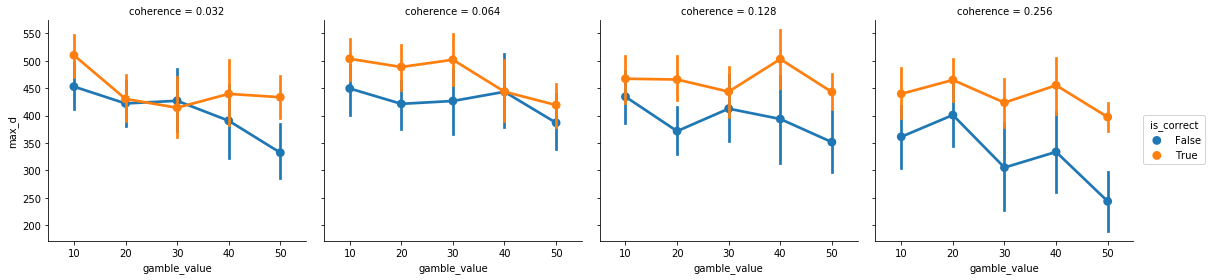

In [11]:
import seaborn as sns
%matplotlib inline
sns.factorplot(data=choices, x='gamble_value', y='max_d', hue='is_correct', col='coherence')